In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [6]:
df1= pd.read_csv('heart.csv')
df1.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


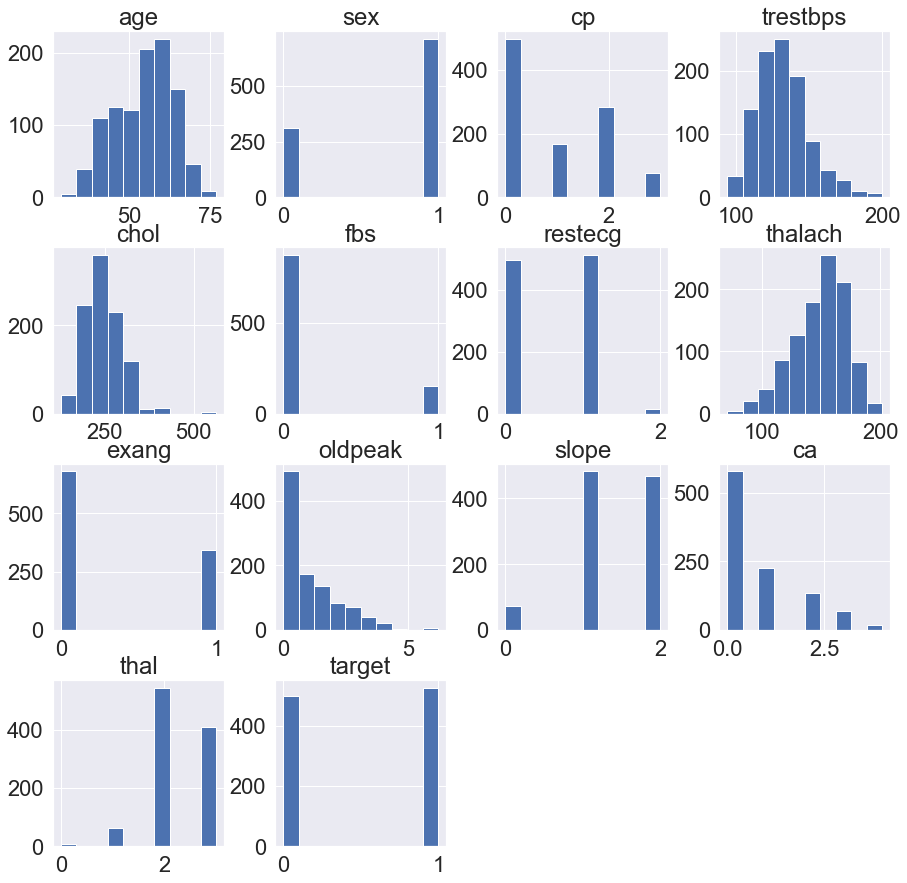

In [7]:
sns.set(font_scale=2)
df1.hist(figsize=[15,15])
plt.show()

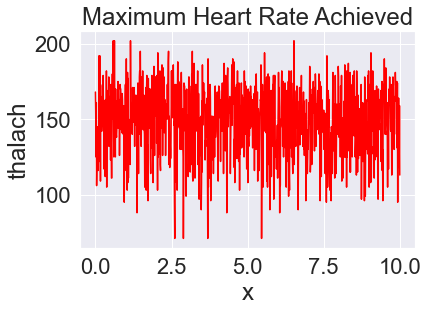

In [9]:
x_ax = np.linspace(0,10,1025)
thalach = df1['thalach']
plt.title('Maximum Heart Rate Achieved')
plt.xlabel('x')
plt.ylabel('thalach')

plt.plot(x_ax,thalach, color='red')
plt.show()

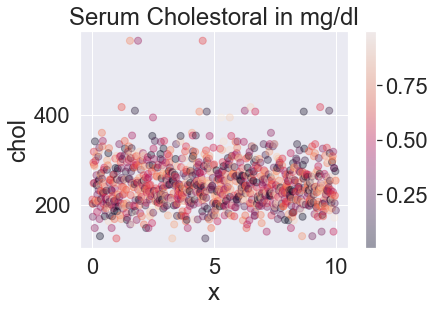

In [11]:
plt.title('Serum Cholestoral in mg/dl')
plt.xlabel('x')
plt.ylabel('chol')

chol = df1['chol']
colors = np.random.rand(1025)
plt.scatter(x_ax, chol, alpha=0.35, c=colors, s=50)
plt.colorbar()
plt.show()

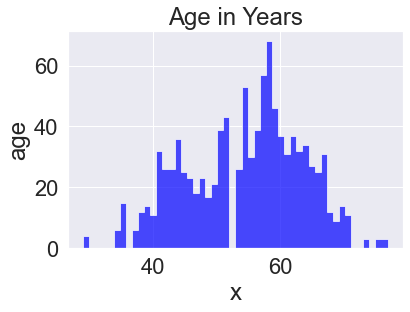

In [12]:
age = df1['age']
plt.title('Age in Years')
plt.xlabel('x')
plt.ylabel('age')

plt.hist(age, alpha=0.7, histtype='stepfilled', bins=50, color='blue')
plt.show()

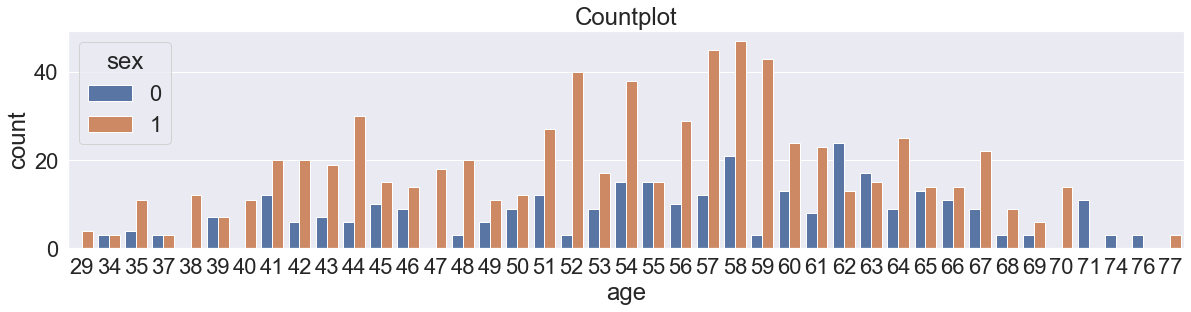

In [14]:
plt.figure(figsize=[20,4])
plt.title('Countplot')
target = df1['target']
sex = df1['sex']
sns.countplot(x=age, hue=sex, data=df1)
plt.show()

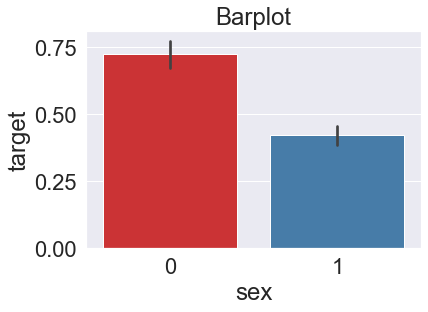

In [15]:
plt.title('Barplot')
sns.barplot(x=sex, y =target, data=df1, palette='Set1')
plt.show()

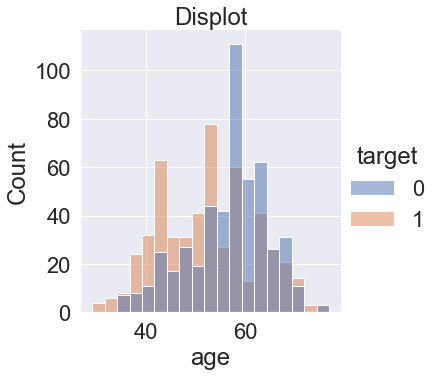

In [16]:
thal = df1['thal']
sns.displot(x=age, data=df1, hue=target)
plt.title('Displot')
plt.show()

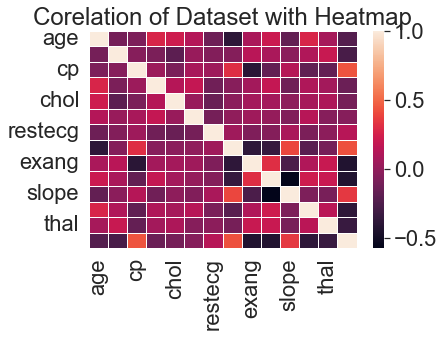

In [17]:
plt.title('Corelation of Dataset with Heatmap')
sns.heatmap(df1.corr(), cbar=True, linewidth=1)
plt.show()

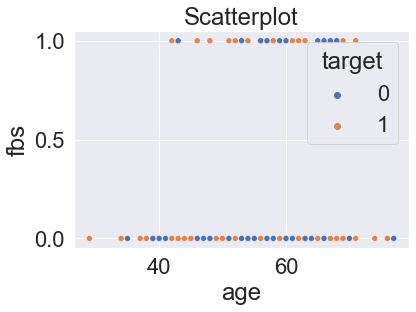

In [18]:
plt.title('Scatterplot')
fbs = df1['fbs']
sns.scatterplot(x=age, y=fbs, hue=target)
plt.show()

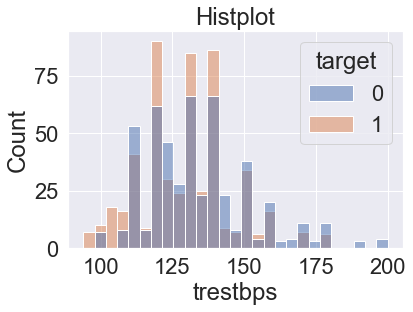

In [20]:
plt.title('Histplot')
trest = df1['trestbps']
sns.histplot(x=trest, hue=target)
plt.show()

In [24]:
X=df1.drop('target',axis=1)
Y=df1['target']

In [25]:
t_size=0.2
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=t_size)

In [27]:
rang=list(range(1,10))
for i in rang:
    LR=LogisticRegression(max_iter=1000)
    LR.fit(x_train,y_train)
    y_pred=LR.predict(x_test)
    acc=accuracy_score(y_test,y_pred)*100
print ("The accuracy of my Logistic Regression model is",acc)
    

The accuracy of my Logistic Regression model is 83.41463414634146


In [8]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense


In [10]:
LR=Sequential([
    Dense(40,input_dim=13,activation='relu'),
    Dense(39,activation='relu'),
    Dense(38,activation='relu'),
    Dense(37,activation='relu'),
    Dense(36,activation='relu'),
    Dense(15,activation='relu'),
    Dense(14,activation='relu'),
    Dense(25,activation='relu'),
    Dense(7,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [11]:
LR.compile(optimizer=keras.optimizers.Adam(),loss='binary_crossentropy',
           metrics=['accuracy'])
LR.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 40)                560       
                                                                 
 dense_6 (Dense)             (None, 39)                1599      
                                                                 
 dense_7 (Dense)             (None, 38)                1520      
                                                                 
 dense_8 (Dense)             (None, 37)                1443      
                                                                 
 dense_9 (Dense)             (None, 36)                1368      
                                                                 
 dense_10 (Dense)            (None, 15)                555       
                                                                 
 dense_11 (Dense)            (None, 14)               

In [23]:
LR.fit(x_train,y_train,epochs=10)
loss,accuracy=LR.evaluate(x_test,y_test)
print("Loss=",loss*100)
print("Accuracy=",accuracy*100)

Epoch 1/10
26/26 [==============================] - 0s 3ms/step - loss: 0.2803 - accuracy: 0.8598
Epoch 2/10
26/26 [==============================] - 0s 4ms/step - loss: 0.2718 - accuracy: 0.8610
Epoch 3/10
26/26 [==============================] - 0s 2ms/step - loss: 0.2908 - accuracy: 0.8524
Epoch 4/10
26/26 [==============================] - 0s 3ms/step - loss: 0.2767 - accuracy: 0.8744
Epoch 5/10
26/26 [==============================] - 0s 3ms/step - loss: 0.2447 - accuracy: 0.8732
Epoch 6/10
26/26 [==============================] - 0s 3ms/step - loss: 0.2289 - accuracy: 0.8866
Epoch 7/10
26/26 [==============================] - 0s 6ms/step - loss: 0.2578 - accuracy: 0.8732
Epoch 8/10
26/26 [==============================] - 0s 7ms/step - loss: 0.2358 - accuracy: 0.8841
Epoch 9/10
26/26 [==============================] - 0s 3ms/step - loss: 0.2258 - accuracy: 0.9024
Epoch 10/10
7/7 [==============================] - 0s 2ms/step - loss: 0.2555 - accuracy: 0.9024
Loss= 25.548046827316

In [28]:
c_matrix=confusion_matrix(y_test,y_pred)
print(c_matrix)

[[85 17]
 [17 86]]


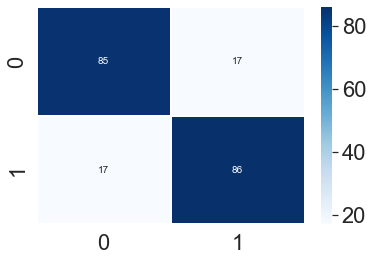

In [29]:
sns.heatmap(c_matrix,annot=True,linewidth=2,cmap='Blues')
plt.show()